# Bias–Variance Tradeoff
    Understanding Error Sources and Model Complexity

## Objective

This notebook provides a clear and operational understanding of the bias–variance tradeoff, covering:

- Decomposition of prediction error

- How model complexity affects bias and variance

- Empirical demonstrations using synthetic data

- Practical diagnostics for real models

- Implications for tuning and deployment

It answers:

Why does increasing model complexity sometimes hurt generalization?

## Why Bias–Variance Matters

Ignoring bias–variance leads to:

- Overfitting

- Underfitting

- Fragile models

- Poor production performance

Every model error comes from three sources:

1. Bias

2. Variance

3. Irreducible noise

## Conceptual Overview

>>> $ E[(y - \bar{y})^2] = Bias^2 + Variance + Noise $

- **Bias** → systematic error

- **Variance** → sensitivity to data fluctuations

- **Noise** → cannot be modeled

## Imports and Dataset

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

In [13]:
# Synthetic Data generation

np.random.seed(2010)

n = 200
X = np.sort(np.random.rand(n))
y_true = np.sin(2 * np.pi * X)
y = y_true + np.random.normal(scale=0.3, size=n)


In [15]:
data = pd.DataFrame(X, columns=['feature'])
data['target'] = y
data.head()

,feature,target
0,0.002201,0.083691
1,0.005049,0.121068
2,0.017790,0.141763
3,0.026229,0.342080
4,0.033767,0.156178


In [5]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X.reshape(-1, 1), y, test_size=0.3, random_state=42
)


# Models with Increasing Complexity

We compare polynomial regression with increasing degree.

## Helper Function

In [8]:
def fit_and_evaluate(degree):
    pipeline = Pipeline([
        ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
        ("model", LinearRegression())
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    return mean_squared_error(y_test, y_pred)


## Bias vs Variance Curve (Empirical)

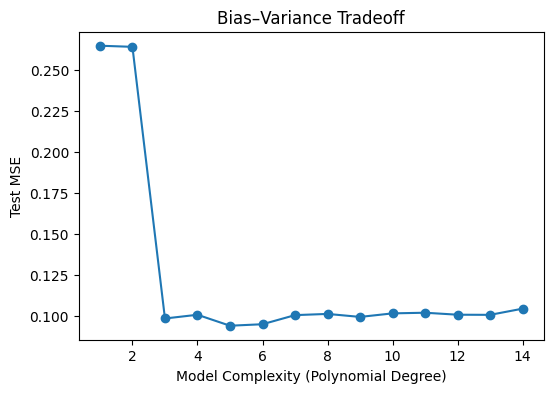

In [9]:
degrees = range(1, 15)
mse_values = [fit_and_evaluate(d) for d in degrees]

plt.figure(figsize=(6, 4))
plt.plot(degrees, mse_values, marker="o")
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Test MSE")
plt.title("Bias–Variance Tradeoff")
plt.show()


#### Interpretation

- Low degree → high bias

- High degree → high variance

- Minimum MSE → optimal complexity

## – Visualizing Underfitting vs Overfitting

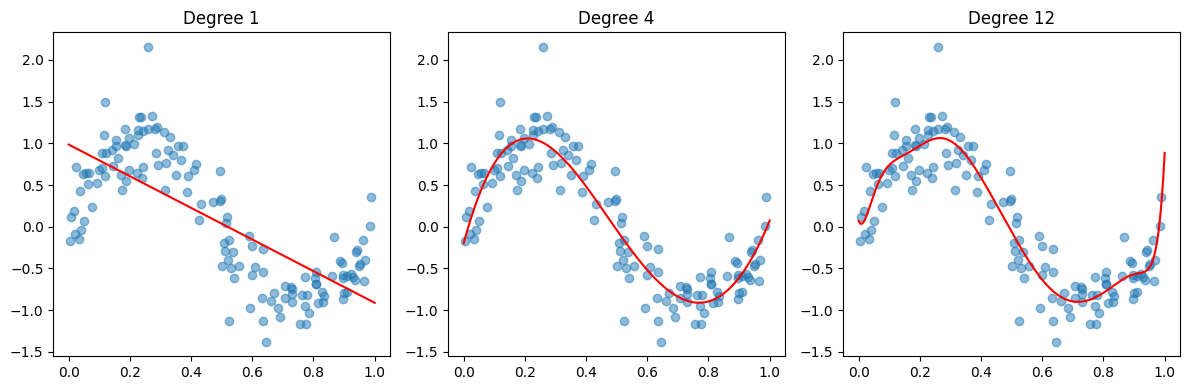

In [16]:
plt.figure(figsize=(12, 4))

for i, degree in enumerate([1, 4, 12]):
    pipeline = Pipeline([
        ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
        ("model", LinearRegression())
    ])
    pipeline.fit(X_train, y_train)
    
    X_plot = np.linspace(0, 1, 200).reshape(-1, 1)
    y_plot = pipeline.predict(X_plot)
    
    plt.subplot(1, 3, i + 1)
    plt.scatter(X_train, y_train, alpha=0.5)
    plt.plot(X_plot, y_plot, color="red")
    plt.title(f"Degree {degree}")

plt.tight_layout()
plt.show()


## Regularization Reduces Variance

Ridge regression penalizes complexity.

In [17]:
def fit_ridge(degree, alpha):
    pipeline = Pipeline([
        ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
        ("model", Ridge(alpha=alpha))
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    return mean_squared_error(y_test, y_pred)


In [18]:
alphas = [0.001, 0.01, 0.1, 1, 10]
ridge_results = {
    alpha: fit_ridge(degree=12, alpha=alpha)
    for alpha in alphas
}

ridge_results


{0.001: 0.09406208877508809,
 0.01: 0.09493039570014904,
 0.1: 0.13717277743781117,
 1: 0.18519798788260788,
 10: 0.28266204949635465}

- ✔ Regularization increases bias slightly
- ✔ Significantly reduces variance

## Learning Curves (Conceptual Diagnostic)

- High training error → high bias

- Large train–test gap → high variance

(Implemented later in model diagnostics notebooks.)

## Bias–Variance in Tree-Based Models

| Model             | Bias | Variance   |
| ----------------- | ---- | ---------- |
| Linear            | High | Low        |
| Decision Tree     | Low  | High       |
| Random Forest     | Low  | Medium     |
| Gradient Boosting | Low  | Controlled |



## Step 9 – Practical Implications

Bias–variance tradeoff guides:

- Feature engineering

- Model selection

- Hyperparameter tuning

- Dataset size decisions

## Common Mistakes (Avoided)

- ❌ Adding complexity blindly
- ❌ Confusing variance with noise
- ❌ Over-regularizing
- ❌ Evaluating on training data
- ❌ Ignoring learning curves

## Summary Table

| Symptom              | Likely Issue  | Remedy              |
| -------------------- | ------------- | ------------------- |
| High train error     | High bias     | Add features        |
| Large train–test gap | High variance | Regularize          |
| Unstable metrics     | High variance | More data           |
| Flat performance     | High bias     | More flexible model |



## Key Takeaways

- Bias and variance are opposing forces

- Complexity must be controlled

- Regularization trades bias for stability

- Cross-validation estimates variance

- Optimal models minimize total error

##  Next Notebook

06_Model_Evaluation_and_Validation/

└── [05_learning_curves_and_diagnostics.ipynb](05_learning_curves_and_diagnostics.ipynb)

<br><br><br><br><br>



# Complete: [Data Science Techniques](https://github.com/lei-soares/Data-Science-Techniques)

- [00_Data_Generation_and_Simulation](https://github.com/lei-soares/Data-Science-Techniques/tree/main/00_Data_Generation_and_Simulation)


- [01_Exploratory_Data_Analysis_(EDA)](https://github.com/lei-soares/Data-Science-Techniques/tree/main/01_Exploratory_Data_Analysis_(EDA))


- [02_Data_Preprocessing](https://github.com/lei-soares/Data-Science-Techniques/tree/main/02_Data_Preprocessing)


- [03_Feature_Engineering](https://github.com/lei-soares/Data-Science-Techniques/tree/main/03_Feature_Engineering)


- [04_Supervised_Learning](https://github.com/lei-soares/Data-Science-Techniques/tree/main/04_Supervised_Learning)

    - [Regression Models](https://github.com/lei-soares/Data-Science-Techniques/tree/49de369e0600a513b54445e8cb4196b26ce71853/04_Supervised_Learning/01_regression_models)
    
    - [Classification Models](https://github.com/lei-soares/Data-Science-Techniques/tree/49de369e0600a513b54445e8cb4196b26ce71853/04_Supervised_Learning/02_classification_models)


- [05_Unsupervised_Learning](https://github.com/lei-soares/Data-Science-Techniques/tree/main/05_Unsupervised_Learning)


- [06_Model_Evaluation_and_Validation](https://github.com/lei-soares/Data-Science-Techniques/tree/main/06_Model_Evaluation_and_Validation)


- [07_Model_Tuning_and_Optimization](https://github.com/lei-soares/Data-Science-Techniques/tree/main/07_Model_Tuning_and_Optimization)


- [08_Interpretability_and_Explainability](https://github.com/lei-soares/Data-Science-Techniques/tree/main/08_Interpretability_and_Explainability)


- [09_Pipelines_and_Workflows](https://github.com/lei-soares/Data-Science-Techniques/tree/main/09_Pipelines_and_Workflows)


- [10_Natural_Language_Processing_(NLP)](https://github.com/lei-soares/Data-Science-Techniques/tree/main/10_Natural_Language_Processing_(NLP))


- [11_Time_Series](https://github.com/lei-soares/Data-Science-Techniques/tree/main/11_Time_Series)


- [12_Anomaly_and_Fraud_Detection](https://github.com/lei-soares/Data-Science-Techniques/tree/main/12_Anomaly_and_Fraud_Detection)


- [13_Imbalanced_Learning](https://github.com/lei-soares/Data-Science-Techniques/tree/main/13_Imbalanced_Learning)


- [14_Deployment_and_Production_Concepts](https://github.com/lei-soares/Data-Science-Techniques/tree/main/14_Deployment_and_Production_Concepts)


- [15_Business_and_Experimental_Design](https://github.com/lei-soares/Data-Science-Techniques/tree/main/15_Business_and_Experimental_Design)




<br><br><br><br><br>

[Panfugo Dados](www.pantufodados.com)


[Pantufo Dados - YouTube Channel](https://www.youtube.com/@pantufodados)